In [71]:
###Load Packages##
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve, auc

%matplotlib inline

In [72]:
###Load Data###
df_train = pd.read_csv("D:/Dropbox/Machine_learning/Projects/Bank_Marketing/bank_additional_full.csv", sep = ";")
df_test = pd.read_csv("D:/Dropbox/Machine_learning/Projects/Bank_Marketing/bank_additional.csv", sep = ";")

In [73]:
###Check basic information###
df_train.head()
df_test.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [57]:
###Check basic information###
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [74]:
###Check basic information###
df_train.dtypes
df_test.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [75]:
###Drop duration due to data leakage###
df_train.drop('duration', axis = 1, inplace = True)
df_test.drop('duration', axis = 1, inplace = True)

In [76]:
###Check missing values###
df_train.isna().sum()
df_test.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [77]:
### Descriptive statistics for numeric variables ###
df_train.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


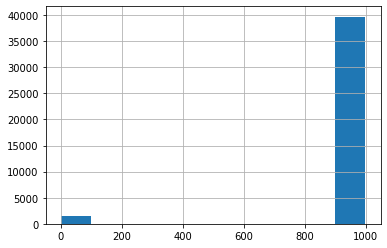

In [78]:
###Check the variable pdays###
df_train['pdays'].hist()

In [79]:
###Change pdays = 'never' for 999 and pdays = 'before'###
df_train.loc[df_train['pdays'] != 999, 'pdays'] = "before"
df_train.loc[df_train['pdays'] == 999, 'pdays'] = "never"
df_test.loc[df_test['pdays'] != 999, 'pdays'] = "before"
df_test.loc[df_test['pdays'] == 999, 'pdays'] = "never"

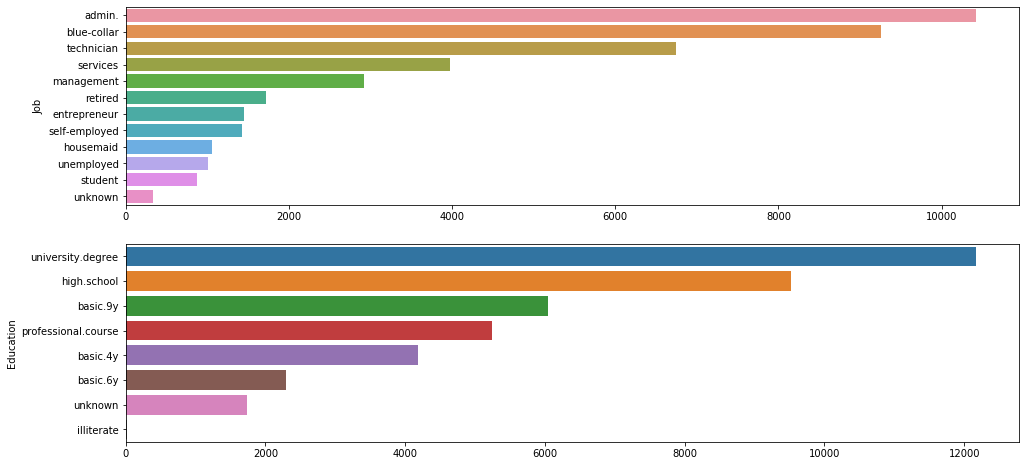

In [80]:
### Barplots for categorical variables ###
### job and education ###
f, axes = plt.subplots(2, 1, figsize=(16, 8))
sns.barplot(df_train['job'].value_counts().values, df_train['job'].value_counts().index, ax = axes[0])
axes[0].set_ylabel("Job")
sns.barplot(df_train['education'].value_counts().values, df_train['education'].value_counts().index, ax = axes[1])
axes[1].set_ylabel("Education")
plt.show()

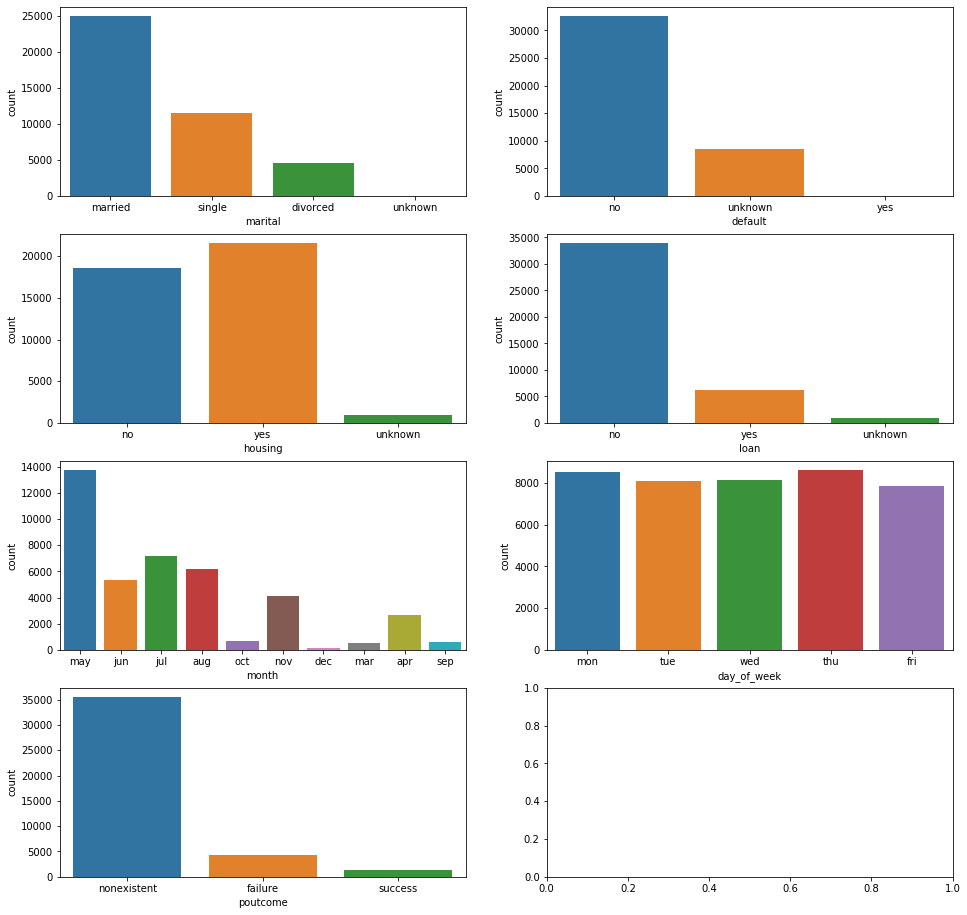

In [81]:
### marital, default, housing, loan, contact, month, day_of_week, poutcome ###
f, axes = plt.subplots(4, 2, figsize=(16, 16), sharey = False)
sns.countplot(df_train['marital'], ax = axes[0, 0])
sns.countplot(df_train['default'], ax = axes[0, 1])
sns.countplot(df_train['housing'], ax = axes[1, 0])
sns.countplot(df_train['loan'], ax = axes[1, 1])
sns.countplot(df_train['month'], ax = axes[2, 0])
sns.countplot(df_train['day_of_week'], ax = axes[2, 1])
sns.countplot(df_train['poutcome'], ax = axes[3, 0])     
plt.show()

In [82]:
###Check missing values of categorical variables###
var_with_unknown = ['job', 'education', 'marital', 'default', 'housing', 'loan']

total = df_train.shape[0]
number = []
percentage = []

for col in var_with_unknown:
    number.append(df_train.loc[df_train[col] == 'unknown', col].count())
    percentage.append(df_train.loc[df_train[col] == 'unknown', col].count() / total *100)
    
missing_table = pd.DataFrame({'Name': var_with_unknown, 'Number': number, 'Percentage': percentage})
missing_table

,Name,Number,Percentage
0,job,330,0.801204
1,education,1731,4.202680
2,marital,80,0.194231
3,default,8597,20.872584
4,housing,990,2.403613
5,loan,990,2.403613


In [83]:
###Drop unknown values for job and marital due to small amounts (80 and 330)###
df_train = df_train[df_train['job'] != 'unknown']
df_train = df_train[df_train['marital'] != "unknown"]
df_test = df_test[df_test['job'] != 'unknown']
df_test = df_test[df_test['marital'] != "unknown"]

In [84]:
#pd.crosstab(df_train['job'], df_train['education'])

In [85]:
###Impute education by using job ###
df_train.loc[(df_train['education']=='unknown') & (df_train['job']=='admin.'), 'education'] = 'university.degree'
df_train.loc[(df_train['education']=='unknown') & (df_train['job']=='blue-collar'), 'education'] = 'basic.9y'
df_train.loc[(df_train['education']=='unknown') & (df_train['job']=='entrepreneur'), 'education'] = 'university.degree'
df_train.loc[(df_train['education']=='unknown') & (df_train['job']=='housemaid'), 'education'] = 'basic.4y'
df_train.loc[(df_train['education']=='unknown') & (df_train['job']=='management'), 'education'] = 'university.degree'
df_train.loc[(df_train['education']=='unknown') & (df_train['job']=='retired'), 'education'] = 'basic.4y'
df_train.loc[(df_train['education']=='unknown') & (df_train['job']=='self-employed'), 'education'] = 'university.degree'
df_train.loc[(df_train['education']=='unknown') & (df_train['job']=='services'), 'education'] = 'high.school'
df_train.loc[(df_train['education']=='unknown') & (df_train['job']=='student'), 'education'] = 'high.school'
df_train.loc[(df_train['education']=='unknown') & (df_train['job']=='technician'), 'education'] = 'professional.course'
df_train.loc[(df_train['education']=='unknown') & (df_train['job']=='unemployed'), 'education'] = 'university.degree'

df_test.loc[(df_test['education']=='unknown') & (df_test['job']=='admin.'), 'education'] = 'university.degree'
df_test.loc[(df_test['education']=='unknown') & (df_test['job']=='blue-collar'), 'education'] = 'basic.9y'
df_test.loc[(df_test['education']=='unknown') & (df_test['job']=='entrepreneur'), 'education'] = 'university.degree'
df_test.loc[(df_test['education']=='unknown') & (df_test['job']=='housemaid'), 'education'] = 'basic.4y'
df_test.loc[(df_test['education']=='unknown') & (df_test['job']=='management'), 'education'] = 'university.degree'
df_test.loc[(df_test['education']=='unknown') & (df_test['job']=='retired'), 'education'] = 'basic.4y'
df_test.loc[(df_test['education']=='unknown') & (df_test['job']=='self-employed'), 'education'] = 'university.degree'
df_test.loc[(df_test['education']=='unknown') & (df_test['job']=='services'), 'education'] = 'high.school'
df_test.loc[(df_test['education']=='unknown') & (df_test['job']=='student'), 'education'] = 'high.school'
df_test.loc[(df_test['education']=='unknown') & (df_test['job']=='technician'), 'education'] = 'professional.course'
df_test.loc[(df_test['education']=='unknown') & (df_test['job']=='unemployed'), 'education'] = 'university.degree'

In [86]:
#pd.crosstab(df_train.job, df_train.housing)

In [87]:
###Impute unknown in housing with its mode###
housing_mode = df_train['housing'].mode()
df_train['housing'].replace('unknown', housing_mode[0], inplace = True)
df_test['housing'].replace('unknown', housing_mode[0], inplace = True)

In [88]:
#pd.crosstab(df_train.job, df_train.loan)

In [89]:
###Impute unknown in loan with its mode###
loan_mode = df_train['loan'].mode()
df_train['loan'].replace('unknown', loan_mode[0], inplace = True)
df_test['loan'].replace('unknown', loan_mode[0], inplace = True)

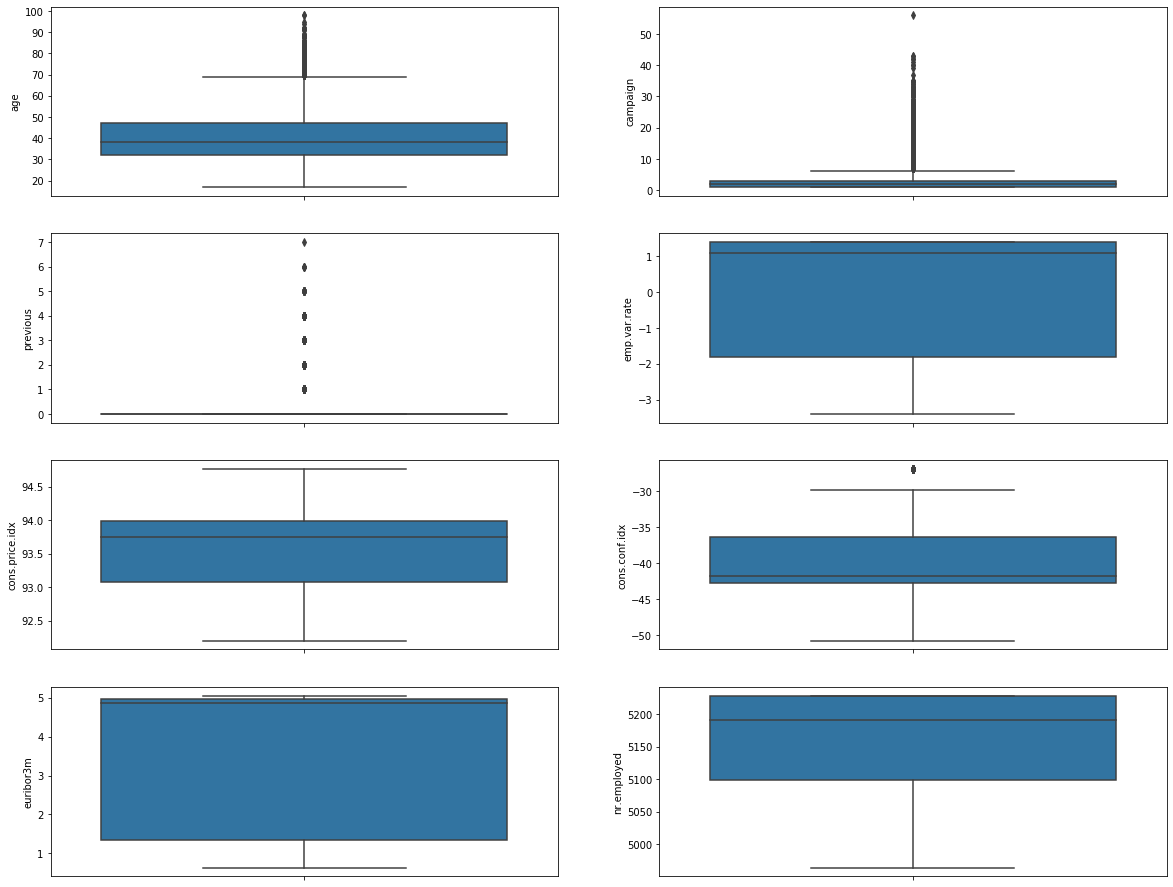

In [90]:
###Use boxplot to check outliers###
f, axes = plt.subplots(4, 2, figsize=(20, 16), sharey = False)
sns.boxplot(df_train['age'], orient='v', ax = axes[0,0])
sns.boxplot(df_train['campaign'], orient='v', ax = axes[0,1])
sns.boxplot(df_train['previous'], orient='v', ax = axes[1,0])
sns.boxplot(df_train['emp.var.rate'], orient='v', ax = axes[1,1])
sns.boxplot(df_train['cons.price.idx'], orient='v', ax = axes[2,0])
sns.boxplot(df_train['cons.conf.idx'], orient='v', ax = axes[2,1])
sns.boxplot(df_train['euribor3m'], orient='v', ax = axes[3,0])
sns.boxplot(df_train['nr.employed'], orient='v', ax = axes[3,1])
plt.show()

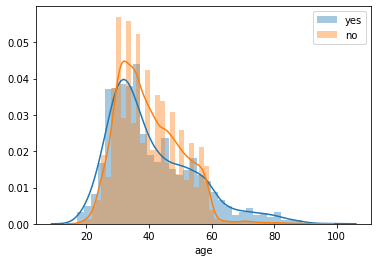

In [91]:
###Plot age by y###
sns.distplot(df_train[df_train['y'] == 'yes']['age'],label = 'yes')
sns.distplot(df_train[df_train['y'] == 'no']['age'],label = 'no')
plt.legend()
plt.show()

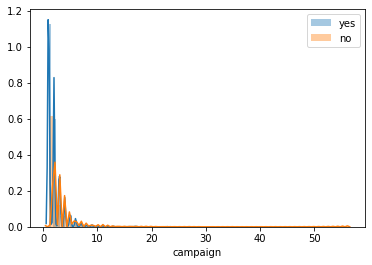

In [92]:
###Plot campaign by y###
sns.distplot(df_train[df_train['y'] == 'yes']['campaign'],label = 'yes')
sns.distplot(df_train[df_train['y'] == 'no']['campaign'],label = 'no')
plt.legend()
plt.show()

In [93]:
###Check the number of persons whose campaign are greater than 75th quantile###
q3 = df_train['campaign'].quantile(0.75)
df_train[df_train['campaign'] >= q3].shape

(12847, 20)

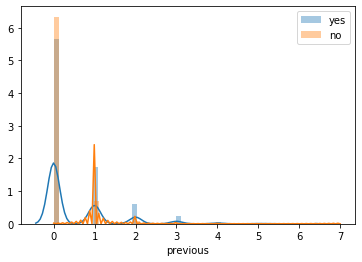

In [94]:
###Plot previous by y###
sns.distplot(df_train[df_train['y'] == 'yes']['previous'],label = 'yes')
sns.distplot(df_train[df_train['y'] == 'no']['previous'],label = 'no')
plt.legend()
plt.show()

In [95]:
###Check the number of persons whose previous are greater than 75th quantile###
q3 = df_train['previous'].quantile(0.75)
df_train[df_train['previous'] >= q3].shape

(40787, 20)

In [96]:
###Convert education to ordinal###
dict = {"university.degree": 6,
        "professional.course": 5,
        "high.school": 4,
        "basic.9y": 3,
        "basic.6y": 2,
        "basic.4y": 1,
        "illiterate": 0}

df_train['education'].replace(dict, inplace = True)
df_test['education'].replace(dict, inplace = True)

In [97]:
### the repsonse variable "y" is unbalanced, use SMOTE###
### convert value yes to 1 and no to 0###
df_train['y'].replace({'no':0, 'yes':1}, inplace = True)
x_train = df_train.copy()
y_train = x_train.pop("y")

df_test['y'].replace({'no':0, 'yes':1}, inplace = True)
x_test = df_test.copy()
y_test = x_test.pop("y")

In [98]:
###Seperate data into categorial and numeric###
cat = ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'pdays']
num = ['age', 'education', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 
       'euribor3m', 'nr.employed']

###Convert categorical variables to dummy variables###
x_train_cat = pd.get_dummies(x_train[cat], drop_first = True)
x_train = pd.concat([x_train, x_train_cat], axis = 1)
x_train.drop(cat, axis = 1, inplace = True)

x_test_cat = pd.get_dummies(x_test[cat], drop_first = True)
x_test = pd.concat([x_test, x_test_cat], axis = 1)
x_test.drop(cat, axis = 1, inplace = True)

###Standardize numerical variables###
SC = StandardScaler()
x_train[num] = SC.fit_transform(x_train[num])
x_test[num] = SC.transform(x_test[num])

In [99]:
###Use SMOTE to incease and balance the data###
from imblearn.over_sampling import SMOTE
over_samples = SMOTE(random_state = 1234)
x_train_smote, y_train_smote = over_samples.fit_sample(x_train, y_train) 
x_train_smote = pd.DataFrame(x_train_smote, columns = x_train.columns)

In [100]:
###Compare different methods###
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

clf = [
    RandomForestClassifier(),    
    LogisticRegression(),       
    KNeighborsClassifier(),
    LinearSVC(), 
    SVC(),
    LinearDiscriminantAnalysis(),
    GradientBoostingClassifier(),
    GaussianNB(),
    XGBClassifier()
    ]

results = []
for model in clf:
    cv_results = cross_val_score(model, x_train_smote, y_train_smote, scoring='roc_auc', cv = 10, n_jobs = -1)
    results.append(cv_results.mean())

clf_name = ['RF', 'LR', 'KNN', 'LinearSVM', 'SVC', 'LDA', 'GB', 'NB', 'XGB']

cv_table = pd.DataFrame({'Method': clf_name, 'auc_mean': results})
cv_table   

,Method,auc_mean
0,RF,0.829976
1,LR,0.642631
2,KNN,0.822220
3,LinearSVM,0.646317
4,SVC,0.646864
5,LDA,0.654781
6,GB,0.891435
7,NB,0.707488
8,XGB,0.881685


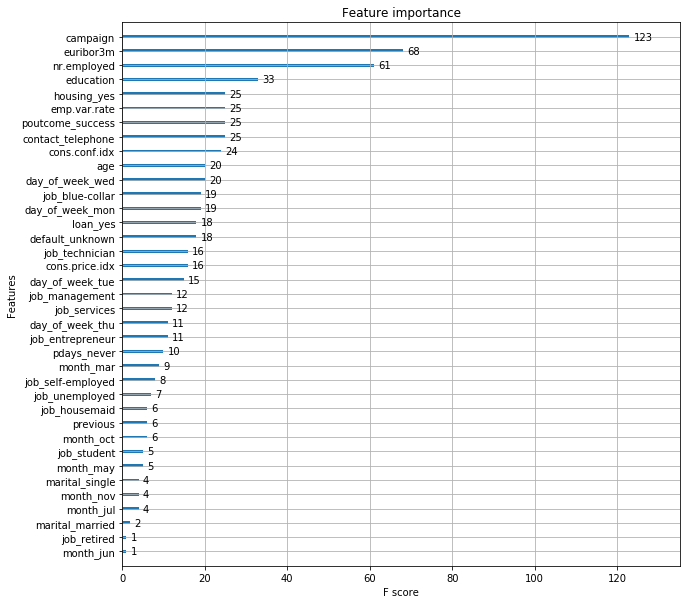

In [101]:
###Plot feature importances and select variables### 
from xgboost import plot_importance
xgb_clf = XGBClassifier()
xgb_clf.fit(x_train_smote, y_train_smote)
fig, ax = plt.subplots(figsize=(10,10))
plot_importance(xgb_clf, ax = ax)
plt.show()

In [102]:
###Use the variables which have f_score >= 4###
imp = pd.DataFrame(list(xgb_clf.get_booster().get_score(importance_type= 'weight').items()), columns = ['features', 'importance'])
imp = imp.set_index('features')
imp = imp.sort_values('importance',ascending=False)
selected_columns = imp[imp['importance'] >= 4].index.tolist()

In [103]:
# from sklearn.metrics import accuracy_score
# from sklearn.feature_selection import SelectFromModel

# x_train_s, x_test_s, y_train_s, y_test_s = train_test_split(x_train_smote, y_train_smote, test_size = 0.3, random_state = 1234)

# model = XGBClassifier()
# model.fit(x_train_s, y_train_s)

# y_pred = model.predict(x_test_s)
# predictions = [round(value) for value in y_pred]

# accuracy = accuracy_score(y_test_s, predictions)
# print("Accuracy: %.2f%%" % (accuracy * 100.0))

# thresholds = sorted(model.feature_importances_)
# for thresh in thresholds:
#     # select features using threshold
#     selection = SelectFromModel(model, threshold=thresh, prefit=True)
#     select_X_train = selection.transform(x_train_s)
 
#     selection_model = XGBClassifier()
#     selection_model.fit(select_X_train, y_train_s)
 
#     select_X_test = selection.transform(x_test_s)
#     y_pred = selection_model.predict(select_X_test)
#     predictions = [round(value) for value in y_pred]
#     accuracy = accuracy_score(y_test_s, predictions)
#     print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

In [104]:
###Use gridsearch to find optimal parameters for xgboost###
###Find optimal n_estimators###
# cv_params = {'n_estimators': [1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000]}
# other_params = {'learning_rate': 0.1, 
#                 'n_estimators': 500, 
#                 'max_depth': 5, 
#                 'min_child_weight': 1, 
#                 'seed': 0,
#                 'subsample': 0.8, 
#                 'colsample_bytree': 0.8, 
#                 'gamma': 0, 
#                 'reg_alpha': 0, 
#                 'reg_lambda': 1}

# xgb_clf = XGBClassifier(**other_params)
# gs1 = GridSearchCV(estimator = xgb_clf, param_grid = cv_params, scoring = 'roc_auc', cv = 5, verbose = 1, n_jobs = -1)
# gs1.fit(x_train_smote, y_train_smote)
# print('best_parameters：{0}'.format(gs1.best_params_))
# print('best_score:{0}'.format(gs1.best_score_))

In [105]:
###Find optimal min_child_weight and max_depth ##
# cv_params = {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10], 
#              'min_child_weight': [1, 2, 3, 4, 5, 6]}

# other_params = {'learning_rate': 0.1, 
#                 'n_estimators': 1500, 
#                 'max_depth': 5, 
#                 'min_child_weight': 1, 
#                 'seed': 0,
#                 'subsample': 0.8, 
#                 'colsample_bytree': 0.8, 
#                 'gamma': 0, 
#                 'reg_alpha': 0, 
#                 'reg_lambda': 1}

# xgb_clf = XGBClassifier(**other_params)
# gs2 = GridSearchCV(estimator = xgb_clf, param_grid = cv_params, scoring = 'roc_auc', cv = 5, verbose = 1, n_jobs = 10)
# gs2.fit(x_train_smote, y_train_smote)
# print('best_parameters：{0}'.format(gs2.best_params_))
# print('best_score:{0}'.format(gs2.best_score_))

In [106]:
###Fit xgboost to the selected data###
###Split training data into training and validation for early stopping###
X_train, X_val, Y_train, Y_val = train_test_split(x_train_smote[selected_columns], y_train_smote, 
                                                    test_size = 0.3, random_state = 1122)

xgb_clf = XGBClassifier(max_depth=10,
                        learning_rate=0.01,
                        n_estimators=2000,
                        silent=True,
                        objective='binary:logistic',
                        nthread=-1,
                        gamma=0,
                        min_child_weight=1,
                        max_delta_step=0,
                        subsample=0.85,
                        colsample_bytree=0.7,
                        colsample_bylevel=1,
                        reg_alpha=0,
                        reg_lambda=1,
                        scale_pos_weight=1,
                        seed=1440,
                        missing=None)

bst = xgb_clf.fit(X_train, Y_train, eval_set = [(X_val, Y_val)], eval_metric='auc', verbose=True,
                  early_stopping_rounds = 10)
y_pred = bst.predict(x_test[selected_columns])
auc_score = roc_auc_score(y_test, y_pred)
print(auc_score)

[0]	validation_0-auc:0.911777
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.929759
[2]	validation_0-auc:0.93993
[3]	validation_0-auc:0.946244
[4]	validation_0-auc:0.948773
[5]	validation_0-auc:0.948713
[6]	validation_0-auc:0.94973
[7]	validation_0-auc:0.95112
[8]	validation_0-auc:0.951074
[9]	validation_0-auc:0.951737
[10]	validation_0-auc:0.95207
[11]	validation_0-auc:0.951831
[12]	validation_0-auc:0.952401
[13]	validation_0-auc:0.952021
[14]	validation_0-auc:0.952013
[15]	validation_0-auc:0.951997
[16]	validation_0-auc:0.952242
[17]	validation_0-auc:0.952656
[18]	validation_0-auc:0.95249
[19]	validation_0-auc:0.95252
[20]	validation_0-auc:0.952913
[21]	validation_0-auc:0.95324
[22]	validation_0-auc:0.953347
[23]	validation_0-auc:0.953496
[24]	validation_0-auc:0.953593
[25]	validation_0-auc:0.953636
[26]	validation_0-auc:0.95364
[27]	validation_0-auc:0.954031
[28]	validation_0-auc:0.954373
[29]	validation_0-auc:0.954608
[30]	validation_0-auc:0.

[259]	validation_0-auc:0.969328
[260]	validation_0-auc:0.969407
[261]	validation_0-auc:0.969459
[262]	validation_0-auc:0.969496
[263]	validation_0-auc:0.969542
[264]	validation_0-auc:0.969565
[265]	validation_0-auc:0.969607
[266]	validation_0-auc:0.969632
[267]	validation_0-auc:0.96967
[268]	validation_0-auc:0.969716
[269]	validation_0-auc:0.969743
[270]	validation_0-auc:0.969775
[271]	validation_0-auc:0.969805
[272]	validation_0-auc:0.969853
[273]	validation_0-auc:0.969896
[274]	validation_0-auc:0.969915
[275]	validation_0-auc:0.969956
[276]	validation_0-auc:0.969998
[277]	validation_0-auc:0.970049
[278]	validation_0-auc:0.970093
[279]	validation_0-auc:0.97014
[280]	validation_0-auc:0.970181
[281]	validation_0-auc:0.970213
[282]	validation_0-auc:0.970262
[283]	validation_0-auc:0.970289
[284]	validation_0-auc:0.970311
[285]	validation_0-auc:0.97033
[286]	validation_0-auc:0.970369
[287]	validation_0-auc:0.970416
[288]	validation_0-auc:0.970455
[289]	validation_0-auc:0.970504
[290]	valid

[517]	validation_0-auc:0.976563
[518]	validation_0-auc:0.97657
[519]	validation_0-auc:0.976577
[520]	validation_0-auc:0.976594
[521]	validation_0-auc:0.976599
[522]	validation_0-auc:0.976611
[523]	validation_0-auc:0.976625
[524]	validation_0-auc:0.976631
[525]	validation_0-auc:0.976637
[526]	validation_0-auc:0.976647
[527]	validation_0-auc:0.97666
[528]	validation_0-auc:0.976669
[529]	validation_0-auc:0.976686
[530]	validation_0-auc:0.976697
[531]	validation_0-auc:0.976708
[532]	validation_0-auc:0.976725
[533]	validation_0-auc:0.976741
[534]	validation_0-auc:0.976759
[535]	validation_0-auc:0.976764
[536]	validation_0-auc:0.976777
[537]	validation_0-auc:0.976794
[538]	validation_0-auc:0.976805
[539]	validation_0-auc:0.97682
[540]	validation_0-auc:0.976819
[541]	validation_0-auc:0.976832
[542]	validation_0-auc:0.976844
[543]	validation_0-auc:0.976858
[544]	validation_0-auc:0.976868
[545]	validation_0-auc:0.976889
[546]	validation_0-auc:0.976911
[547]	validation_0-auc:0.976922
[548]	valid

[774]	validation_0-auc:0.978655
[775]	validation_0-auc:0.978655
[776]	validation_0-auc:0.978657
[777]	validation_0-auc:0.978656
[778]	validation_0-auc:0.978659
[779]	validation_0-auc:0.978661
[780]	validation_0-auc:0.978666
[781]	validation_0-auc:0.978672
[782]	validation_0-auc:0.97868
[783]	validation_0-auc:0.978684
[784]	validation_0-auc:0.978688
[785]	validation_0-auc:0.978689
[786]	validation_0-auc:0.978699
[787]	validation_0-auc:0.978702
[788]	validation_0-auc:0.978703
[789]	validation_0-auc:0.978707
[790]	validation_0-auc:0.97871
[791]	validation_0-auc:0.978712
[792]	validation_0-auc:0.978714
[793]	validation_0-auc:0.978716
[794]	validation_0-auc:0.978717
[795]	validation_0-auc:0.978722
[796]	validation_0-auc:0.978728
[797]	validation_0-auc:0.97873
[798]	validation_0-auc:0.978736
[799]	validation_0-auc:0.978738
[800]	validation_0-auc:0.978736
[801]	validation_0-auc:0.978736
[802]	validation_0-auc:0.978741
[803]	validation_0-auc:0.978745
[804]	validation_0-auc:0.978746
[805]	valid

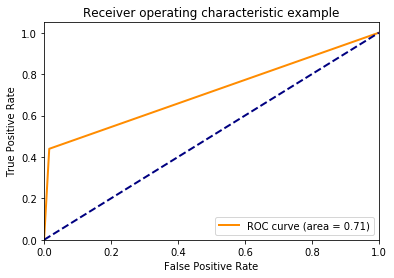

In [107]:
###Plot roc curve###
fpr, tpr, threholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()